<img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/banner-spectral.png" width="1000" align="middle"/>

# <font color='#ECA702'>**Demo target detection🎯**</font>

Reference: [Spectral Matching and Target Detection Techniques](https://www.mathworks.com/help/images/target-detection-and-spectral-matching-techniques.html)

##Carga de los datos

In [3]:
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image

In [10]:
%%capture
!pip install gdown
!gdown --id 1qElBEdiEAbwI8MUd6Gq0BEZiw9mSwD_V -O /content/data.zip
!unzip /content/data.zip -d /content/data

In [4]:
import gdown
def load_from_drive(file_id, name):
  gdown.download(id=file_id, output=name, quiet=False)
  return name

In [6]:
load_from_drive('1w93WWvoCWvhleF6X2dk1S7pBZnbpR4Ao', 'coffee_gt')

Downloading...
From: https://drive.google.com/uc?id=1w93WWvoCWvhleF6X2dk1S7pBZnbpR4Ao
To: /content/coffee_gt
100%|██████████| 249k/249k [00:00<00:00, 72.0MB/s]


'coffee_gt'

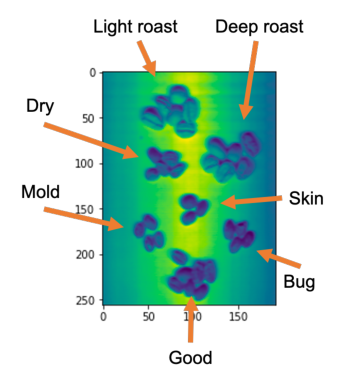

In [7]:
from PIL import Image
import numpy as np

coffee_gt = Image.open('coffee_gt')
coffee_gt = np.array(coffee_gt)
plt.imshow(coffee_gt)
plt.axis('off')
plt.show()

In [11]:
folder_path = "/content/data/coffee"

image_files = sorted(glob.glob(folder_path + "/*.png"))

spectral_cube = np.array([np.array(Image.open(img)) for img in image_files])
spectral_cube = np.transpose(spectral_cube, (1, 2, 0))

print(f"Cubo espectral generado con forma: {spectral_cube.shape}")

# extraigamos las longitudes de onda de los nombres de los archivos
image_files = sorted(glob.glob(folder_path + "/*.png"))
wavelengths = [int(file.split("_")[-1].split("nm")[0]) for file in image_files]
print(wavelengths)

Cubo espectral generado con forma: (256, 192, 96)
[1293, 1302, 1312, 1322, 1332, 1341, 1351, 1361, 1370, 1380, 1390, 1400, 1409, 1419, 1429, 1438, 1448, 1458, 1467, 1477, 1487, 1497, 1506, 1516, 1526, 1535, 1545, 1555, 1564, 1574, 1584, 1594, 1603, 1613, 1623, 1632, 1642, 1652, 1662, 1671, 1681, 1691, 1700, 1710, 1720, 1729, 1739, 1749, 1759, 1768, 1778, 1788, 1797, 1807, 1817, 1827, 1836, 1846, 1856, 1865, 1875, 1885, 1894, 1904, 1914, 1924, 1933, 1943, 1953, 1962, 1972, 1982, 1991, 2001, 2011, 2021, 2030, 2040, 2050, 2059, 2069, 2079, 2089, 2098, 2108, 2118, 2127, 2137, 2147, 2156, 2166, 2176, 2186, 2195, 2205, 2215]


Pixel value at (100, 220): [0 0 0 0]


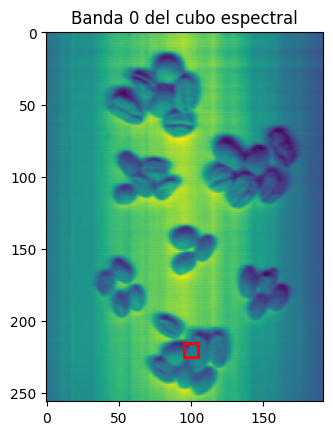

In [12]:
import matplotlib.patches as patches

# Select a pixel (example coordinates)
x = 100
y = 220
# Create a rectangle patch
rect = patches.Rectangle((x - 5, y - 5), 10, 10, linewidth=2, edgecolor='r', facecolor='none')
plt.imshow(spectral_cube[:, :, 0])
# Add the patch to the Axes
ax = plt.gca()
ax.add_patch(rect)

# Print pixel value (optional)
print(f"Pixel value at ({x}, {y}): {coffee_gt[y, x]}")

plt.title('Banda 0 del cubo espectral')
plt.show()

[39 40 43 47 50 52 51 51 51 49 47 43 39 36 34 33 33 34 35 36 38 40 42 44
 46 47 49 50 52 53 54 55 57 59 61 63 64 65 65 64 62 58 55 51 48 47 48 49
 49 50 50 51 51 50 50 49 49 49 49 48 46 42 37 31 27 26 25 24 24 24 25 25
 25 25 25 24 24 22 21 21 20 19 19 18 17 16 15 14 13 12 10  9  8  7  6  6]


Text(0.5, 1.0, 'Spectrum from Pixel 100,220')

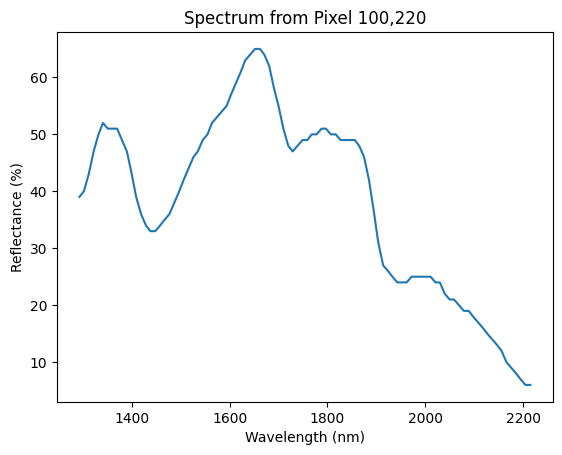

In [13]:
spectral_cube_original = spectral_cube.copy()
spectrum = spectral_cube[y,x,:]
print(spectrum)

#trazar el espectro en ese pixel
plt.plot(wavelengths,spectrum)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.title(('Spectrum from Pixel ' + str(x)+ ','+str(y)))

##Procesamiento

In [37]:
spectral_cube = spectral_cube_original
#FILTROS
from scipy.ndimage import median_filter, gaussian_filter
# Filtro mediana en cada banda para eliminar ruido granular
spectral_cube = median_filter(spectral_cube, size=(3, 3, 1))
# Filtro Gaussiano para suavizar detalles no deseados
#spectral_cube = gaussian_filter(spectral_cube, sigma=(0,0,1))

In [16]:
#NORMALIZACIÓN
p_low, p_high = np.percentile(spectral_cube, (2, 98), axis=(0, 1), keepdims=True)
spectral_cube = (spectral_cube - p_low) / (p_high - p_low + 1e-6)
spectral_cube = np.clip(spectral_cube, 0, 1)

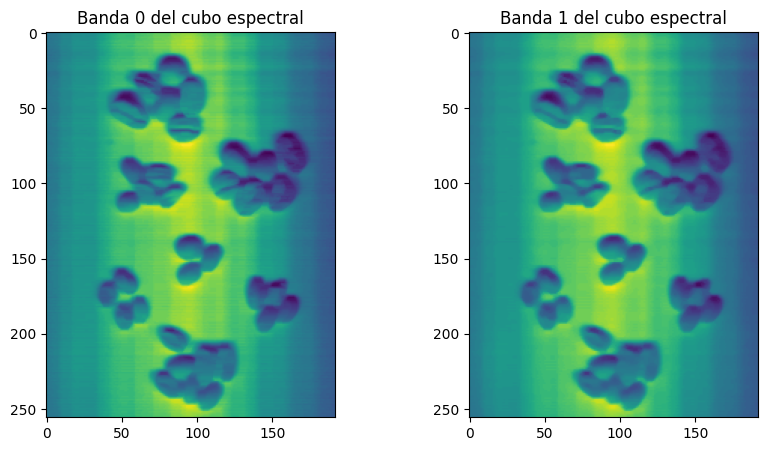

In [38]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(spectral_cube_original[:, :, 0])
plt.title('Banda 0 del cubo espectral')

plt.subplot(1, 2, 2)
plt.imshow(spectral_cube[:, :, 0])
plt.title('Banda 1 del cubo espectral')
plt.show()


In [39]:
#PCA (Principal Component Analisys)
from sklearn.decomposition import PCA

num_bands = spectral_cube.shape[2]
pca = PCA(n_components=5)  # Reducimos 5 bandas de menor relevancia
spectral_cube_pca = pca.fit_transform(spectral_cube.reshape(-1, num_bands))
spectral_cube_pca = spectral_cube_pca.reshape(spectral_cube.shape[0], spectral_cube.shape[1], -1)

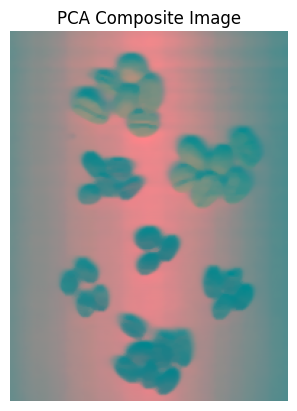

In [40]:
# Simple RGB visualization using first 3 PCs
rgb = spectral_cube_pca[:, :, :3]
plt.imshow((rgb - rgb.min()) / (rgb.max() - rgb.min()))
plt.title("PCA Composite Image")
plt.axis('off')
plt.show()


##Selección de objetivo

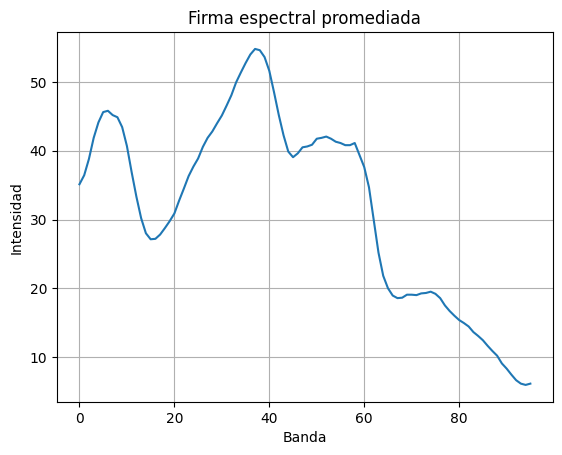

In [41]:
pixel_x = 220
pixel_y = 100
window_size = 5
x_min, x_max = pixel_x - window_size//2, pixel_x + window_size//2
y_min, y_max = pixel_y - window_size//2, pixel_y + window_size//2

spectral_signature = np.mean(spectral_cube[x_min:x_max, y_min:y_max, :], axis=(0, 1))

plt.plot(spectral_signature)
plt.xlabel("Banda")
plt.ylabel("Intensidad")
plt.title("Firma espectral promediada")
plt.grid()
plt.show()

## HSI detectors

In [42]:
def smf_detector(x,tgt_sig,mu=None,siginv=None):

	pix = topix(x)
	n_pix,n_band = pix.shape

	if mu is None:
		mu = pix.mean(axis=0)
	if siginv is None:
		sig = np.cov(pix.T)
		siginv = np.linalg.inv(sig)

	s = tgt_sig - mu
	z = pix - mu
	f = s.dot(siginv) / math.sqrt(s.dot(siginv.dot(s)))
	smf_data = z.dot(f)

	return toimg(smf_data,x,2)

def topix(x):
	return x.reshape( (x.shape[0]*x.shape[1],x.shape[2]) )

def toimg(pix,x,n_dim=None):
	if n_dim is None:
		n_dim = len(x.shape)

	return pix.reshape(x.shape[:n_dim])

def ace_detector(x,tgt_sig,mu=None,siginv=None):

	pix = topix(x)
	n_pix,n_band = pix.shape

	if mu is None:
		mu = pix.mean(axis=0)
	if siginv is None:
		sig = np.cov(pix.T)
		siginv = np.linalg.inv(sig)

	s = tgt_sig - mu
	z = pix - mu
	st_siginv = s.dot(siginv)

	A = z.dot(st_siginv)
	B = np.sqrt(st_siginv.dot(s))
	C = np.sqrt(np.sum(z * z.dot(siginv.T), axis=1))
	ace_data = A/(B*C)

	return toimg(ace_data,x,2)

##Resultados

In [43]:
conf_ace = smf_detector(spectral_cube,spectral_signature)

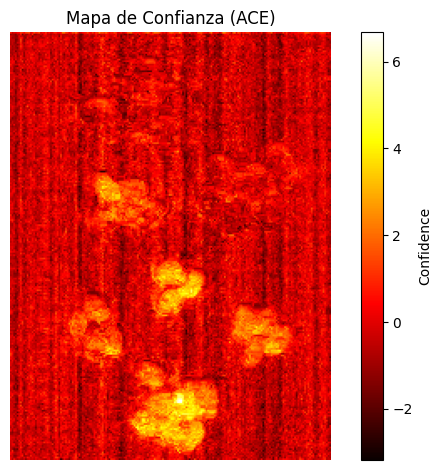

In [44]:
plt.imshow(conf_ace, cmap='hot')  # You can also try 'viridis', 'plasma', 'inferno'
plt.colorbar(label='Confidence')  # Add a colorbar to interpret the scale
plt.title('Mapa de Confianza (ACE)')
plt.axis('off')  # Optional, hides axis ticks
plt.tight_layout()
plt.show()

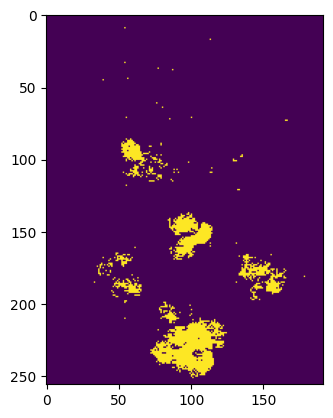

In [47]:
plt.imshow(conf_ace>2)

#References
[Near Infrared Hyperspectral Image Dataset](https://www.kaggle.com/datasets/hacarus/near-infrared-hyperspectral-image)